<a href="https://colab.research.google.com/github/AhmedZaghl0ul/Machine-Learning/blob/main/Brain_tumor_(Denoising_by_Auto_Encoder).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
dir = "/content/drive/MyDrive/DataSets/Brain tumor"

In [32]:
import os

images_paths = os.listdir(dir)
len(images_paths)

100

In [33]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

images = []
for img_name in os.listdir(dir):
    img_path = os.path.join(dir, img_name)
    img = load_img(img_path, target_size=(128, 128))
    img = img_to_array(img) / 255.0
    images.append(img)

images = np.array(images)

In [34]:
noise_factor = 0.2
noise_images = []

for i in images:
    noise_img = i + noise_factor * np.random.randn(*i.shape)
    noise_img = np.clip(noise_img, 0., 1.)
    noise_images.append(noise_img)

noise_images = np.array(noise_images)

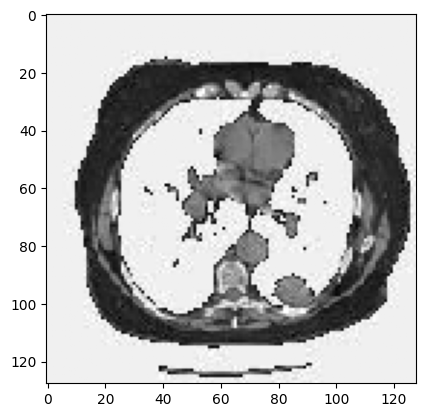

In [35]:
import matplotlib.pyplot as plt

plt.imshow(images[0] , cmap='gray')

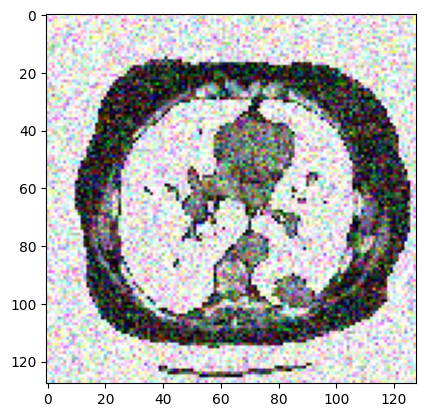

In [36]:
plt.imshow(noise_images[0] , cmap='gray')

In [37]:
# x_train, x_test = train_test_split(images, test_size=0.2, random_state=42)

In [38]:
len(noise_images)

100

In [39]:
noise_train = noise_images[:60]
noise_test = noise_images[60:]

normal_train = images[:60]
normal_test = images[60:]

In [40]:
from tensorflow.keras import layers, models

input_img = layers.Input(shape=(128, 128, 3))

# Encoder
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2,2), padding='same')(x)  # 32x32x16

# Decoder
x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2,2))(x)
decoded = layers.Conv2D(3, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')



In [41]:
autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,347 (52.14 KB)

 Trainable params: 13,347 (52.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 900ms/step - loss: 0.5865 - val_loss: 0.5341
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 883ms/step - loss: 0.5591 - val_loss: 0.5335
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 850ms/step - loss: 0.5647 - val_loss: 0.5268
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - loss: 0.5535 - val_loss: 0.5182
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 841ms/step - loss: 0.5452 - val_loss: 0.5226
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 860ms/step - loss: 0.5447 - val_loss: 0.5223
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 0.5391 - val_loss: 0.5108
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - loss: 0.5309 - val_loss: 0.4988
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 0.5230 - val_loss: 0.4903
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 840ms/step - loss: 0.5101 - val_loss: 0.4775
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 855ms/step - loss: 0.4999 - val_loss: 0.4719
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 880ms/step - loss: 0.4939 - val_loss: 0.4530
E

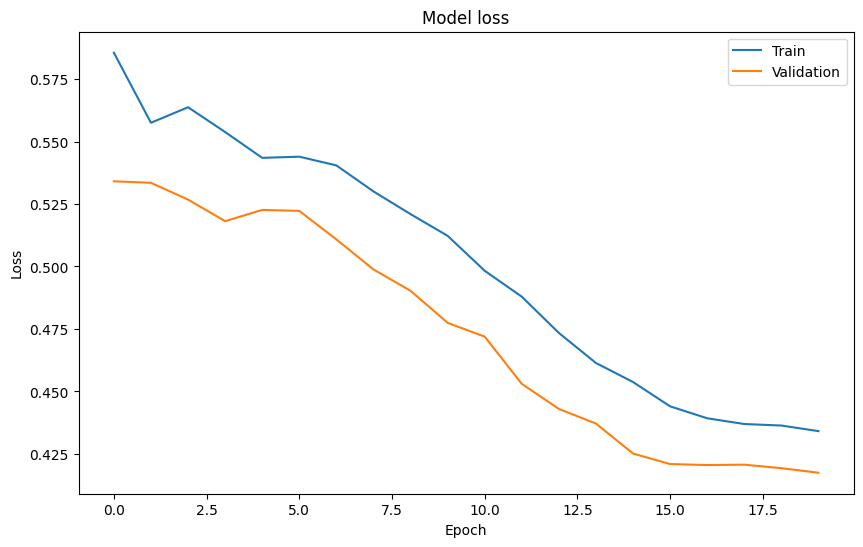

In [43]:
history = autoencoder.fit(
    noise_train, normal_train,
    epochs=20,
    batch_size=32,
    shuffle=True,
    validation_split=0.2
)

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

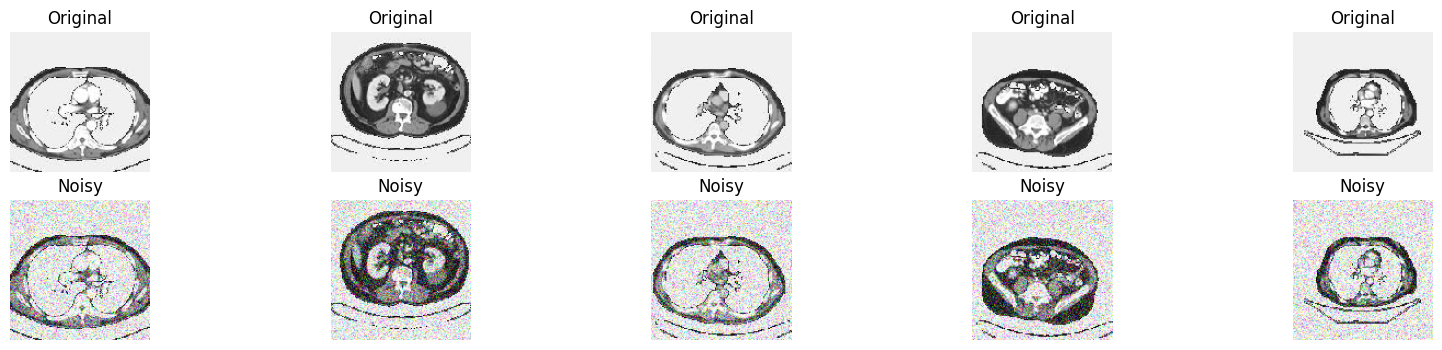

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step


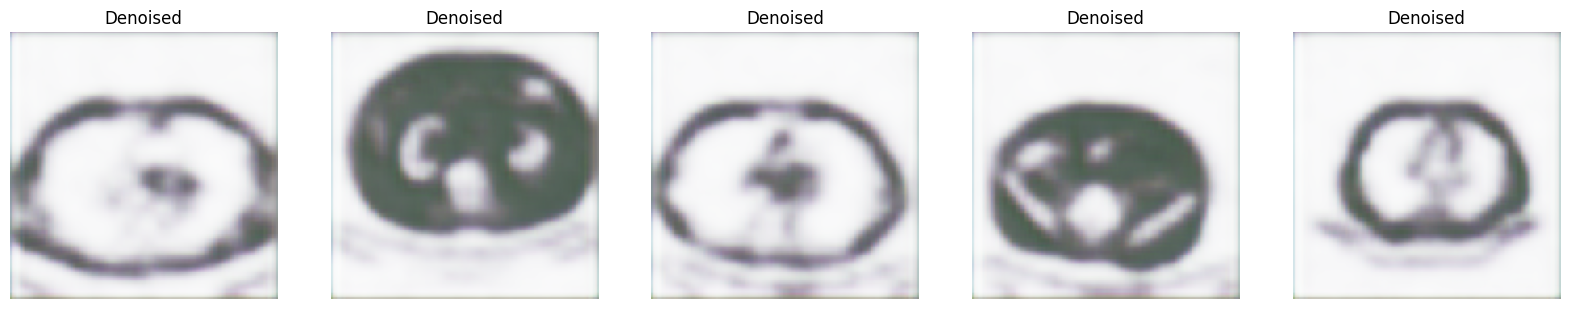

In [44]:
# Select a few images from the test set
n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(normal_test[i] , cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Display noisy images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(noise_test[i] , cmap='gray')
    plt.title("Noisy")
    plt.axis("off")
plt.show()

# Predict denoised images from the noisy test set
denoised_images = autoencoder.predict(noise_test)

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display denoised images
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(denoised_images[i] , cmap='gray')
    plt.title("Denoised")
    plt.axis("off")
plt.show()

In [45]:
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error

psnr_values = []

for i in range(len(normal_test)):
    psnr = peak_signal_noise_ratio(normal_test[i], denoised_images[i])
    psnr_values.append(psnr)

average_psnr = np.mean(psnr_values)

print(f"Average PSNR: {average_psnr:.2f}")

Average PSNR: 15.29


In [46]:
actual_values = normal_test.flatten()
predicted_values = denoised_images.flatten()

In [47]:
mse = mean_squared_error(actual_values, predicted_values)
print(f"Mean Squared Error: {mse:.6f}")

Mean Squared Error: 0.030290


In [48]:
evaluation = autoencoder.evaluate(noise_test, normal_test)
print(f"Evaluation (Binary Cross Entrpoy): {evaluation}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.4328
Evaluation (Binary Cross Entrpoy): 0.4326569437980652
